In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import sys
import os
import torch

In [81]:
ENERGY_PATH = "data/energy/"
WEATHER_PATH = "data/weather/Weather_Data_Germany.csv"

weather_data = pd.read_csv(WEATHER_PATH, sep=",")

prices_data = pd.read_csv(ENERGY_PATH + "Prices_Europe.csv", sep=";")
installed_capacity = pd.read_csv(ENERGY_PATH + "Installed_Capacity_Germany.csv", sep=";")
weather_data.tail()

,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
2104315,14.8,51.2,2021-12-31 00:00:00,2021-12-31 23:00:00,2835274.0,2180.3394,101831.690,838.02860,1.000008,6.772395,-0.635157,283.54050,2171042.0,4075276.0,10313.742,0.001773,0.680833,11.236713,-1.493503
2104316,14.8,50.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3174462.0,1949.3633,102003.055,815.65460,0.981605,5.854994,0.206125,284.05286,3600288.0,5727868.0,25293.312,0.000539,0.622661,10.005124,-0.225957
2104317,14.8,49.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3614996.0,4384.6490,102251.730,741.03357,0.630130,5.271448,-1.014326,281.04538,3281948.0,5547652.0,25715.790,0.002406,0.851062,9.639029,-2.366759
2104318,14.8,48.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3894518.0,3073.1455,102469.890,420.26746,0.440941,4.102491,-0.592839,280.20236,4438841.0,6871398.0,27216.710,0.000576,0.897962,8.555898,-1.410386
2104319,14.8,47.2,2021-12-31 00:00:00,2021-12-31 23:00:00,4849962.0,9583.7320,102244.875,37.15387,0.035555,1.795015,-0.220017,273.95093,4189784.0,6439440.0,28799.164,0.000000,1.819780,4.665255,-2.722088


In [82]:

weather_data['time'] = pd.to_datetime(weather_data['time'], format='%Y-%m-%d %H:%M:%S')
#weather_data['forecast_origin'] = pd.to_datetime(weather_data['forecast_origin'], format='%Y-%m-%d %H:%M:%S')
"""

march_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')
october_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')
weather_data[weather_data['time'].dt.date.isin(march_2019.date)].head()
"""

"\n\nmarch_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')\noctober_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')\nweather_data[weather_data['time'].dt.date.isin(march_2019.date)].head()\n"

In [83]:
weather_data.tail()


,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100
2104315,14.8,51.2,2021-12-31 00:00:00,2021-12-31 23:00:00,2835274.0,2180.3394,101831.690,838.02860,1.000008,6.772395,-0.635157,283.54050,2171042.0,4075276.0,10313.742,0.001773,0.680833,11.236713,-1.493503
2104316,14.8,50.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3174462.0,1949.3633,102003.055,815.65460,0.981605,5.854994,0.206125,284.05286,3600288.0,5727868.0,25293.312,0.000539,0.622661,10.005124,-0.225957
2104317,14.8,49.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3614996.0,4384.6490,102251.730,741.03357,0.630130,5.271448,-1.014326,281.04538,3281948.0,5547652.0,25715.790,0.002406,0.851062,9.639029,-2.366759
2104318,14.8,48.2,2021-12-31 00:00:00,2021-12-31 23:00:00,3894518.0,3073.1455,102469.890,420.26746,0.440941,4.102491,-0.592839,280.20236,4438841.0,6871398.0,27216.710,0.000576,0.897962,8.555898,-1.410386
2104319,14.8,47.2,2021-12-31 00:00:00,2021-12-31 23:00:00,4849962.0,9583.7320,102244.875,37.15387,0.035555,1.795015,-0.220017,273.95093,4189784.0,6439440.0,28799.164,0.000000,1.819780,4.665255,-2.722088


In [84]:
#average the first 80 values of z
avg_z = np.mean(weather_data['z'][:80])
print(avg_z)

3360.2965609700004


In [85]:
# Converting 'forecast_origin' and 'time' to datetime
weather_data['forecast_origin'] = pd.to_datetime(weather_data['forecast_origin'])
weather_data['time'] = pd.to_datetime(weather_data['time'])

# Calculate the hourly averages while keeping 'time' and 'forecast_origin' columns
averages = weather_data.groupby('time').mean().reset_index()
averages['forecast_origin'] = weather_data['forecast_origin'].iloc[0]

# longitudes and latitudes no longer needed
averages.drop(['longitude', 'latitude'], axis=1, inplace=True)
averages.head()

,time,cdir,z,msl,blh,tcc,u10,v10,t2m,ssr,tsr,sund,tp,fsr,u100,v100,forecast_origin
0,2019-01-01 00:00:00,0.0,3360.296561,103009.967750,507.635043,0.966562,3.867164,1.065368,278.216013,0.0,0.0,0.0,0.000000,0.741971,6.545994,1.122055,2019-01-01
1,2019-01-01 01:00:00,0.0,3360.296561,102964.489612,544.627164,0.959348,4.092345,1.116217,278.310794,0.0,0.0,0.0,0.000038,0.742205,6.838839,1.241379,2019-01-01
2,2019-01-01 02:00:00,0.0,3360.296561,102908.208325,575.103757,0.966846,4.320050,1.223478,278.206292,0.0,0.0,0.0,0.000070,0.742254,7.183921,1.428783,2019-01-01
3,2019-01-01 03:00:00,0.0,3360.296561,102827.034387,612.314609,0.979125,4.638074,1.222571,278.140331,0.0,0.0,0.0,0.000099,0.742272,7.660834,1.501984,2019-01-01
4,2019-01-01 04:00:00,0.0,3360.296561,102725.913987,660.112603,0.981526,4.980449,1.055763,278.102989,0.0,0.0,0.0,0.000135,0.742255,8.147790,1.289936,2019-01-01


In [86]:
# number of weather stations   
print("Number of unique longitude-latitude pairs: ", weather_data.groupby(["longitude", "latitude"]).ngroups)

Number of unique longitude-latitude pairs:  80


In [87]:
#column where t2m is converted to celsius from kelvin
averages['t2m_C'] = averages['t2m'] - 273.15

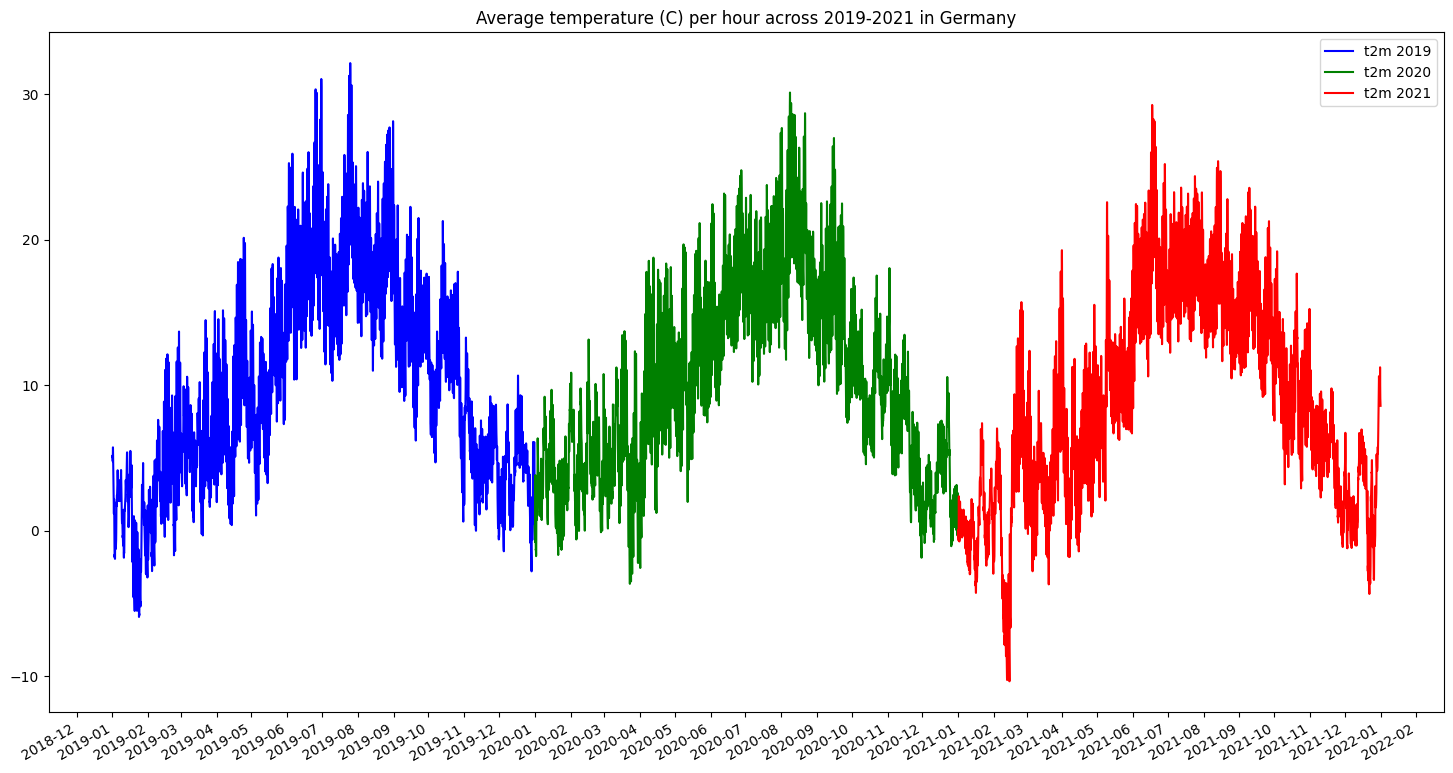

In [88]:
#plot ssr and t2m for each year separately
# add ticks on x axis for 
import matplotlib.dates as mdates

averages['time'] = pd.to_datetime(averages['time'])  # Make sure 'time' is in datetime format

plt.figure(figsize=(18, 10))

# Define colors or line styles if you want distinct appearances
colors = ['blue', 'green', 'red']
years = range(2019, 2022)

for i, year in enumerate(years):
    # Filter data for each year
    year_data = averages[averages['time'].dt.year == year]
    
    # Plot each year's data
    plt.plot(year_data['time'], year_data['t2m_C'], label=f't2m {year}', color=colors[i])

# Set x-axis major ticks to the first day of each month and format them
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optional: Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.title("Average temperature (C) per hour across 2019-2021 in Germany")
plt.show()

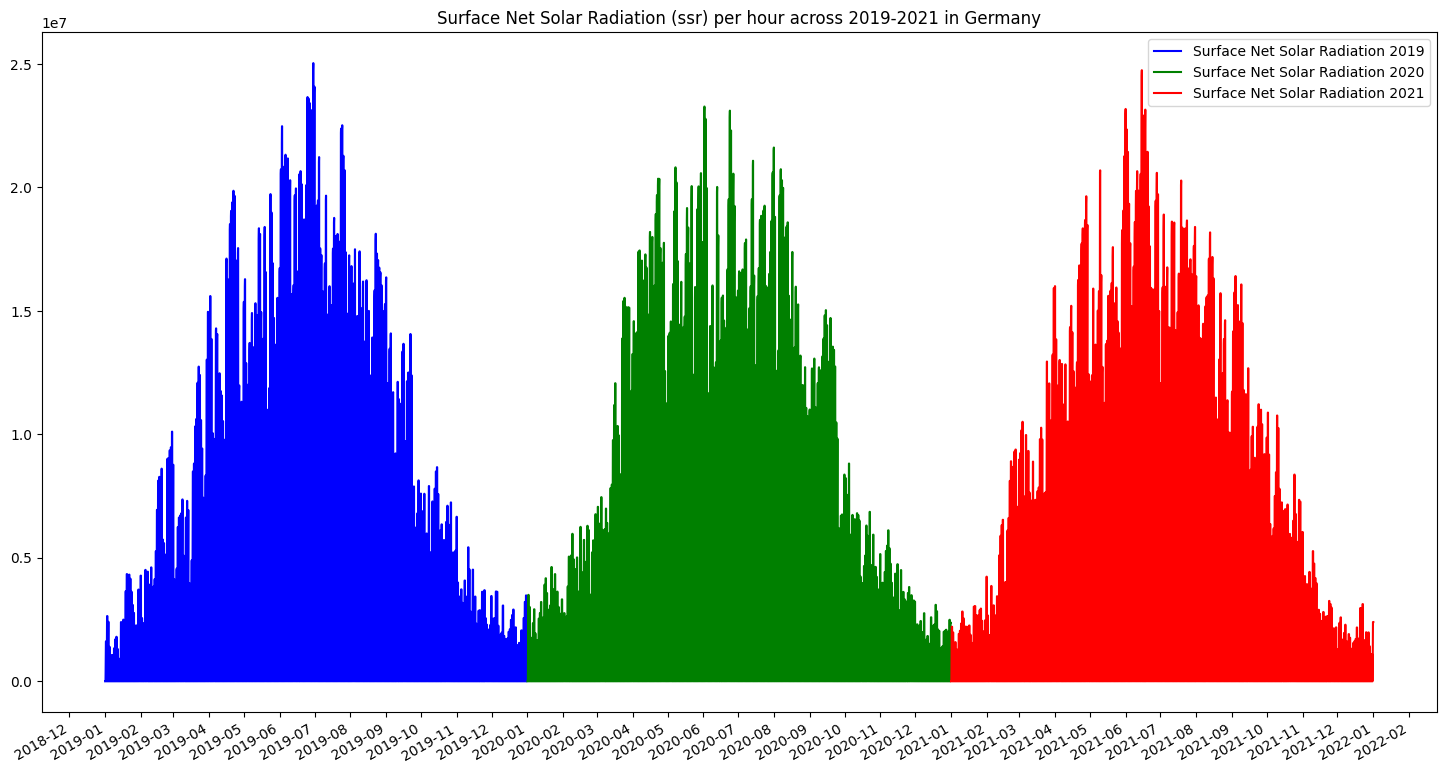

In [89]:
#same as above but for srr
averages['time'] = pd.to_datetime(averages['time'])  # Convert 'time' to datetime format

plt.figure(figsize=(18, 10))

# Define colors or line styles for visual distinction
colors = ['blue', 'green', 'red']  # Different colors for each year
years = range(2019, 2022)

for i, year in enumerate(years):
    # Filter data for each year
    year_data = averages[averages['time'].dt.year == year]
    
    # Plot 'srr' data for each year
    plt.plot(year_data['time'], year_data['ssr'], label=f'Surface Net Solar Radiation {year}', color=colors[i])

# Set x-axis major ticks to the first day of each month and format them
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optional: Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.title("Surface Net Solar Radiation (ssr) per hour across 2019-2021 in Germany")
plt.show()

In [90]:
# find most significant variables in data for solar energy prediction / wind energy prediction
# normalize data + further pre processing
# build model
# train small train split for debugging
# train entire model
# finde tune hyperparameters with validation set    
# test model on test set

In [91]:
demand_data = pd.read_csv(ENERGY_PATH + "Reaslised_Demand_Germany.csv", sep=";")
demand_data.head()

,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
0,01.01.19 00:00,01.01.19 00:15,"10.982,75","5.349,25","456,75"
1,01.01.19 00:15,01.01.19 00:30,"10.864,75","5.040,50","333,75"
2,01.01.19 00:30,01.01.19 00:45,"10.737,75","4.732,50",280
3,01.01.19 00:45,01.01.19 01:00,"10.680,25","4.617,50","304,5"
4,01.01.19 01:00,01.01.19 01:15,"10.599,00","4.485,00","249,75"


In [92]:
supply_data = pd.read_csv(ENERGY_PATH + "Realised_Supply_Germany.csv", sep=";")
supply_data.head()

,Date from,Date to,Biomass [MW],Hydro Power [MW],Wind Offshore [MW],Wind Onshore [MW],Photovoltaic [MW],Other Renewable [MW],Nuclear Power [MW],Lignite [MW],Coal [MW],Natural Gas [MW],Pumped Storage [MW],Other Conventional [MW]
0,01.01.19 00:00,01.01.19 00:15,"1.199,00",401,"794,25","4.839,25",0,"31,5","2.250,50","1.733,00","836,25","850,5","87,5","431,75"
1,01.01.19 00:15,01.01.19 00:30,"1.203,00","394,75","793,5","5.030,75",0,"31,5","2.263,25","1.587,75","729,5","821,5","99,25","429,75"
2,01.01.19 00:30,01.01.19 00:45,"1.204,50","381,25","791,75","5.213,50",0,"31,5","2.246,00","1.555,25","648,5","804,75",44,"431,25"
3,01.01.19 00:45,01.01.19 01:00,"1.208,75",381,"754,5","5.308,25",0,"31,5","2.241,75","1.459,00","597,5","796,5",41,"431,5"
4,01.01.19 01:00,01.01.19 01:15,"1.204,50","388,25","715,5","5.398,50",0,"31,5","2.224,50","1.367,75","610,5","765,5",21,"429,25"


In [93]:
import pytz
# find time shift from winter to summer time in demand data "Date from" key

demand_data['Date from'] = pd.to_datetime(demand_data['Date from'],format='%d.%m.%y %H:%M')
demand_data['Date to'] = pd.to_datetime(demand_data['Date to'], format='%d.%m.%y %H:%M')
supply_data['Date from'] = pd.to_datetime(supply_data['Date from'], format='%d.%m.%y %H:%M')
supply_data['Date to'] = pd.to_datetime(supply_data['Date to'], format='%d.%m.%y %H:%M')
prices_data['Date from'] = pd.to_datetime(prices_data['Date from'],format='%d.%m.%y %H:%M')
prices_data['Date to'] = pd.to_datetime(prices_data['Date to'],format='%d.%m.%y %H:%M')
installed_capacity['Date from'] = pd.to_datetime(installed_capacity['Date from'])
installed_capacity['Date to'] = pd.to_datetime(installed_capacity['Date to'])



In [94]:
# get all days of march in 2019
march_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')
october_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')
# show all instances in demanddata
demand_data[demand_data['Date from'].dt.date.isin(march_2019.date)].head(10)

#demand_data[demand_data['Date from'].dt.date.isin(october_2019.date)].head(50)

,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
8544,2019-03-31 00:00:00,2019-03-31 00:15:00,"10.918,25","8.702,25","321,5"
8545,2019-03-31 00:15:00,2019-03-31 00:30:00,"10.817,00","8.551,25",339
8546,2019-03-31 00:30:00,2019-03-31 00:45:00,"10.624,50","8.285,00","444,5"
8547,2019-03-31 00:45:00,2019-03-31 01:00:00,"10.538,25","8.134,75","656,5"
8548,2019-03-31 01:00:00,2019-03-31 01:15:00,"10.436,00","8.041,50","425,25"
8549,2019-03-31 01:15:00,2019-03-31 01:30:00,"10.321,50","7.914,25",499
8550,2019-03-31 01:30:00,2019-03-31 01:45:00,"10.262,25","7.832,00","563,25"
8551,2019-03-31 01:45:00,2019-03-30 02:00:00,"7.354,50","4.910,75","672,25"
8552,2019-03-31 03:00:00,2019-03-31 03:15:00,"10.128,75","7.773,25","669,5"
8553,2019-03-31 03:15:00,2019-03-31 03:30:00,"10.123,25","7.659,00","712,5"


In [95]:
# convert to UTC
demand_data['Date from'] = demand_data['Date from'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
demand_data['Date to'] = demand_data['Date to'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')


supply_data['Date from'] = supply_data['Date from'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
supply_data['Date to'] = supply_data['Date to'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
prices_data['Date from'] = prices_data['Date from'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
prices_data['Date to'] = prices_data['Date to'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
installed_capacity['Date from'] = installed_capacity['Date from'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')
installed_capacity['Date to'] = installed_capacity['Date to'].dt.tz_localize('CET', ambiguous=True).dt.tz_convert('UTC')



In [96]:
# get all days of march in 2019
march_2019 = pd.date_range(start='2019-03-31', end='2019-03-31', freq='D')
october_2019 = pd.date_range(start='2019-10-27', end='2019-10-27', freq='D')
# show all instances in demanddata
demand_data[demand_data['Date from'].dt.date.isin(march_2019.date)].head(10)

#demand_data[demand_data['Date from'].dt.date.isin(october_2019.date)].head(50)

,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
8548,2019-03-31 00:00:00+00:00,2019-03-31 00:15:00+00:00,"10.436,00","8.041,50","425,25"
8549,2019-03-31 00:15:00+00:00,2019-03-31 00:30:00+00:00,"10.321,50","7.914,25",499
8550,2019-03-31 00:30:00+00:00,2019-03-31 00:45:00+00:00,"10.262,25","7.832,00","563,25"
8551,2019-03-31 00:45:00+00:00,2019-03-30 01:00:00+00:00,"7.354,50","4.910,75","672,25"
8552,2019-03-31 01:00:00+00:00,2019-03-31 01:15:00+00:00,"10.128,75","7.773,25","669,5"
8553,2019-03-31 01:15:00+00:00,2019-03-31 01:30:00+00:00,"10.123,25","7.659,00","712,5"
8554,2019-03-31 01:30:00+00:00,2019-03-31 01:45:00+00:00,"10.111,50","7.640,25","740,25"
8555,2019-03-31 01:45:00+00:00,2019-03-31 02:00:00+00:00,"10.080,50","7.549,50","760,25"
8556,2019-03-31 02:00:00+00:00,2019-03-31 02:15:00+00:00,"10.018,25","7.443,25","928,25"
8557,2019-03-31 02:15:00+00:00,2019-03-31 02:30:00+00:00,"10.091,50","7.483,50","859,25"


In [97]:
#only use data until the end of 2021
demand_data_train = demand_data[demand_data['Date from'] < '2022-01-01']
supply_data_train = supply_data[supply_data['Date from'] < '2022-01-01']
demand_data_train.tail()



,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
105215,2021-12-31 22:45:00+00:00,2021-12-31 23:00:00+00:00,"11.205,00","3.226,25",756
105216,2021-12-31 23:00:00+00:00,2021-12-31 23:15:00+00:00,"11.161,50","3.194,75","599,75"
105217,2021-12-31 23:15:00+00:00,2021-12-31 23:30:00+00:00,"11.058,75","3.136,00",595
105218,2021-12-31 23:30:00+00:00,2021-12-31 23:45:00+00:00,"10.931,75","3.129,00","649,5"
105219,2021-12-31 23:45:00+00:00,2022-01-01 00:00:00+00:00,"10.763,50","2.992,50",695


In [98]:
def clean_convert_to_float(x):
    if not isinstance(x, str):
        return x
    x = x.replace('.', '').replace(',', '.')
    try:
        return float(x)
    except ValueError:
        return x
    

demand_data_train.iloc[:, 2:] = demand_data_train.iloc[:, 2:].applymap(clean_convert_to_float)


C:\Users\belau\AppData\Local\Temp\ipykernel_20616\2441936016.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_data_train.iloc[:, 2:] = demand_data_train.iloc[:, 2:].applymap(clean_convert_to_float)


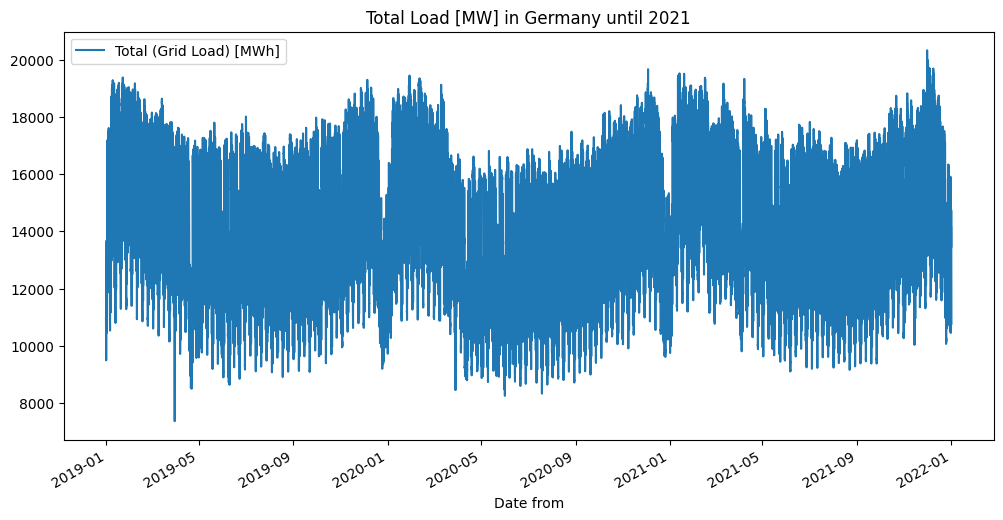

In [99]:


demand_data_train.plot(figsize=(12, 6), x='Date from', y='Total (Grid Load) [MWh]')
plt.title("Total Load [MW] in Germany until 2021")
plt.show()

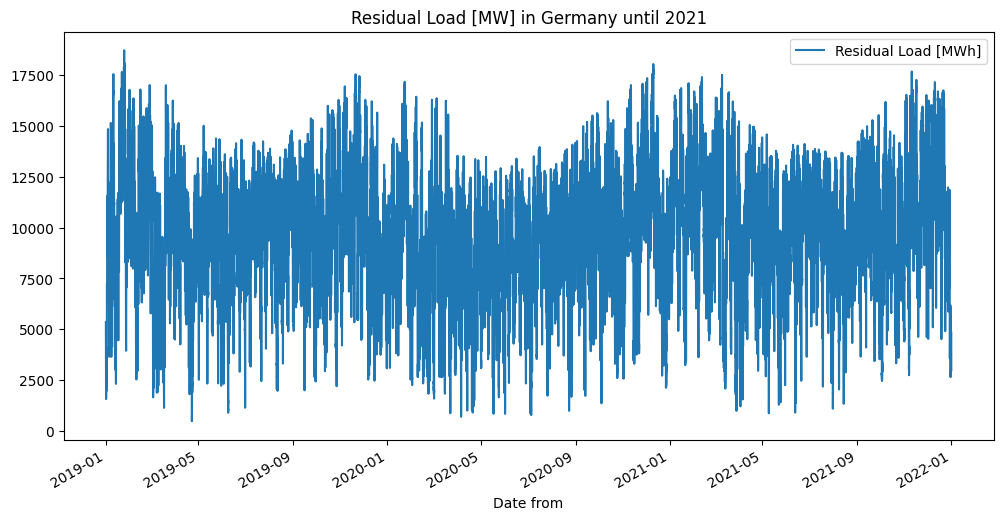

In [100]:
demand_data_train.plot(figsize=(12, 6), x='Date from', y='Residual Load [MWh]')
plt.title("Residual Load [MW] in Germany until 2021")
plt.show()

In [101]:

#fix typo in column name for wind offshore
supply_data_train.rename(columns={'Wind Offshore [MW] ': 'Wind Offshore [MW]'}, inplace=True)
supply_data_train.columns.values

C:\Users\belau\AppData\Local\Temp\ipykernel_20616\3759259857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_data_train.rename(columns={'Wind Offshore [MW] ': 'Wind Offshore [MW]'}, inplace=True)


array(['Date from', 'Date to', 'Biomass [MW]', 'Hydro Power [MW]',
       'Wind Offshore [MW]', 'Wind Onshore [MW]', 'Photovoltaic [MW]',
       'Other Renewable [MW]', 'Nuclear Power [MW]', 'Lignite [MW]',
       'Coal [MW]', 'Natural Gas [MW]', 'Pumped Storage [MW]',
       'Other Conventional [MW]'], dtype=object)

In [102]:
supply_data_train.iloc[:, 2:] = supply_data_train.iloc[:, 2:].applymap(clean_convert_to_float)
supply_data_train["Wind total [MW]"] = supply_data_train[["Wind Offshore [MW]","Wind Onshore [MW]"]].sum( axis=1)
# make sure it is float
supply_data_train["Wind total [MW]"].head()

C:\Users\belau\AppData\Local\Temp\ipykernel_20616\69185201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_data_train.iloc[:, 2:] = supply_data_train.iloc[:, 2:].applymap(clean_convert_to_float)
C:\Users\belau\AppData\Local\Temp\ipykernel_20616\69185201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_data_train["Wind total [MW]"] = supply_data_train[["Wind Offshore [MW]","Wind Onshore [MW]"]].sum( axis=1)


0    5633.50
1    5824.25
2    6005.25
3    6062.75
4    6114.00
Name: Wind total [MW], dtype: float64

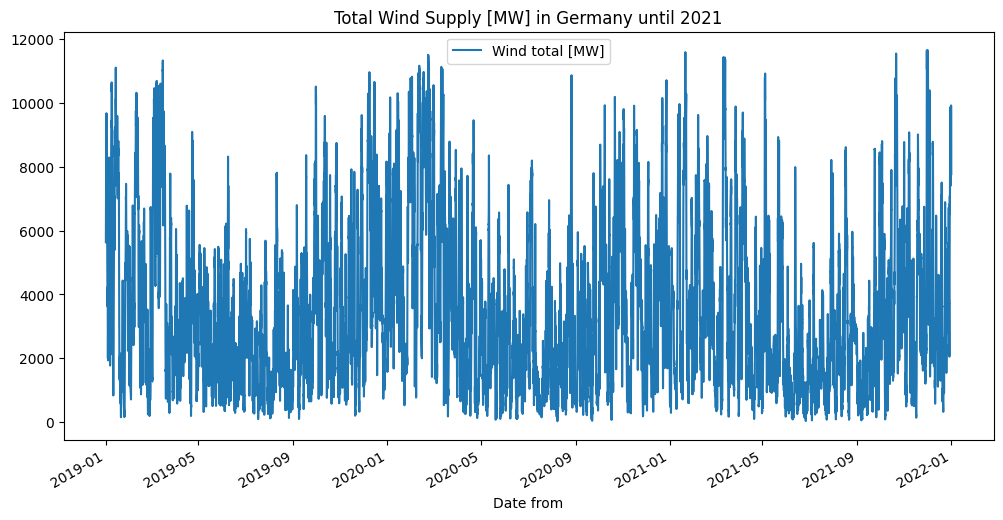

In [103]:
# plot total wind supply and photovoltaic supply
supply_data_train.plot(figsize=(12, 6) ,x='Date from', y='Wind total [MW]')
plt.title("Total Wind Supply [MW] in Germany until 2021")
plt.show()


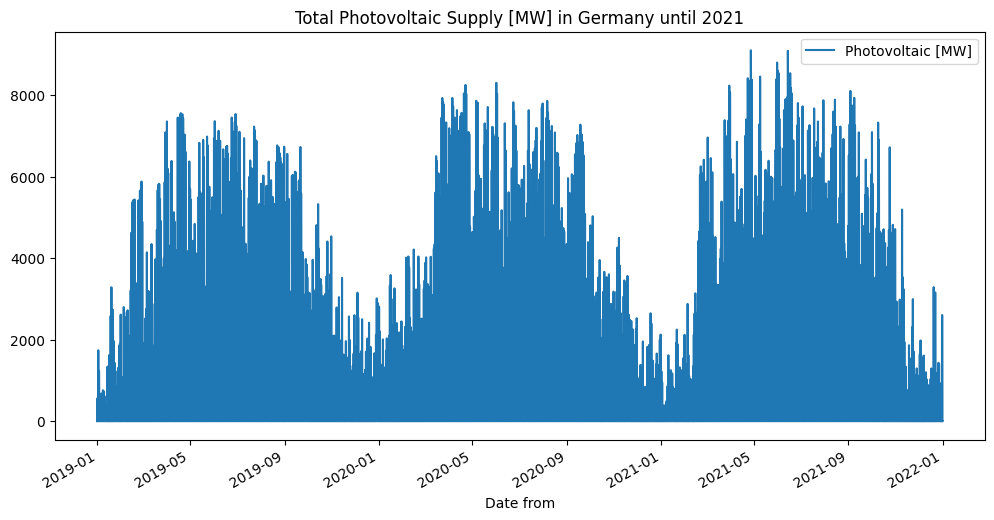

In [104]:
supply_data_train.plot(figsize=(12, 6) ,x='Date from', y='Photovoltaic [MW]')
plt.title("Total Photovoltaic Supply [MW] in Germany until 2021")
plt.show()


In [105]:
installed_capacity_train = installed_capacity[installed_capacity['Date from'] < '2022-01-01']
installed_capacity_train.iloc[:, 2:] = installed_capacity_train.iloc[:, 2:].applymap(clean_convert_to_float)
prices_data_train = prices_data[prices_data['Date from'] < '2022-01-01']
prices_data_train.iloc[:, 2:] = prices_data_train.iloc[:, 2:].applymap(clean_convert_to_float)

C:\Users\belau\AppData\Local\Temp\ipykernel_20616\460908553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_data_train.iloc[:, 2:] = prices_data_train.iloc[:, 2:].applymap(clean_convert_to_float)


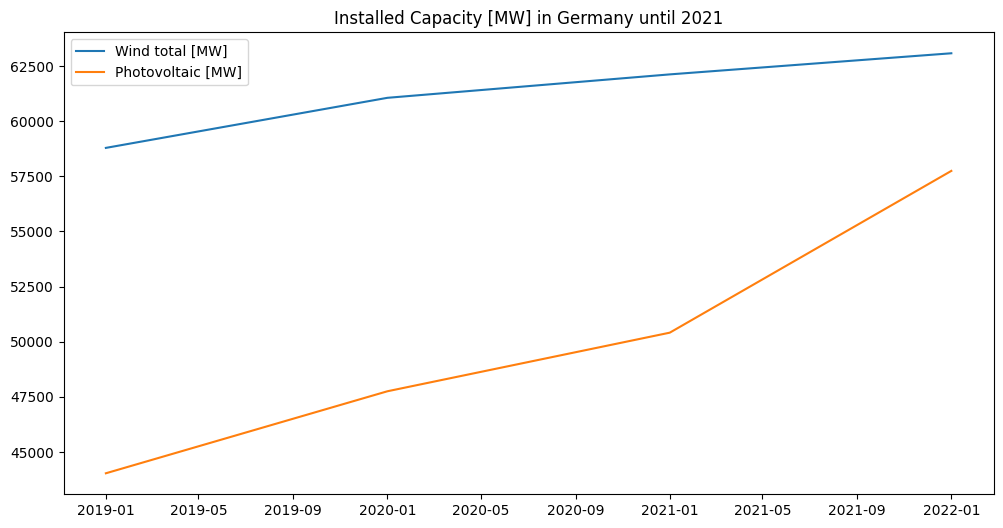

In [106]:
# combine wind offshore and onshore install capacity
installed_capacity_train["Wind total [MW]"] = installed_capacity_train[["Wind Offshore [MW] ", "Wind Onshore [MW]"]].sum(axis=1)
# plot wind total and photovoltaic installed capacity
plt.figure(figsize=(12, 6))
plt.plot(installed_capacity_train['Date from'], installed_capacity_train['Wind total [MW]'], label='Wind total [MW]')
plt.plot(installed_capacity_train['Date from'], installed_capacity_train['Photovoltaic [MW]'], label='Photovoltaic [MW]')
plt.title("Installed Capacity [MW] in Germany until 2021")
plt.legend()
plt.show()

C:\Users\belau\AppData\Local\Temp\ipykernel_20616\751921817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_data_train.iloc[:, 2:] = prices_data_train.iloc[:, 2:].applymap(clean_convert_to_float)
C:\Users\belau\AppData\Local\Temp\ipykernel_20616\751921817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_data_train.replace('-', np.nan, inplace=True)


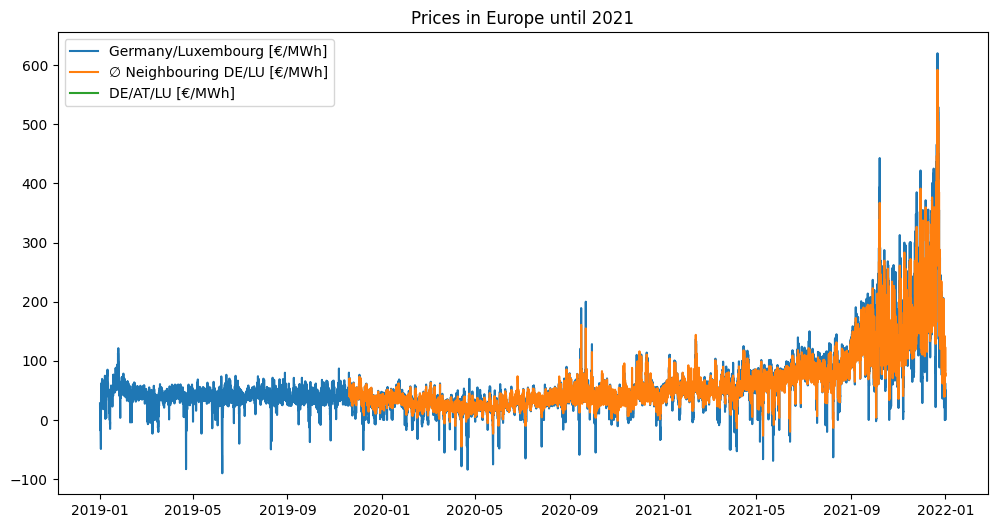

In [107]:
prices_data_train = prices_data[prices_data['Date from'] < '2022-01-01']
prices_data_train.iloc[:, 2:] = prices_data_train.iloc[:, 2:].applymap(clean_convert_to_float)
# change - to None
prices_data_train.replace('-', np.nan, inplace=True)
# plot all prices in one big plot
plt.figure(figsize=(12, 6))
for column in ['Germany/Luxembourg [€/MWh]', '∅ Neighbouring DE/LU [€/MWh]', 'DE/AT/LU [€/MWh]']:
    plt.plot(prices_data_train['Date from'], prices_data_train[column], label=column)
plt.title("Prices in Europe until 2021")
plt.legend()
plt.show()


Prices for DE/AT/LU are missing completely and avg Neighbouring DE/LU is incomplete so I will not consider them for further training

In [108]:
print(10982.75	+ 10864.75	+ 10737.75	+ 10680.25	)

43265.5


In [109]:
# combine 15 minute intervals to hourly intervals in demand data
demand_data_train_hourly = demand_data_train.resample('H', on='Date from').sum()


assert len(demand_data_train_hourly.index) == len(demand_data_train.index) // 4

In [110]:
#on oktober 27th 2019, 2020-10-25, and 2021-10-31, there is an error demand data. the 15 min intervals from 0:00-1:00 appear twice

In [111]:
supply_data_train_hourly = supply_data_train.resample('H', on='Date from').sum()
assert len(supply_data_train_hourly.index) == len(supply_data_train.index) // 4

In [112]:
# convert weather data to UTC
averages['time'] = averages['time'].dt.tz_localize('UTC')
averages['forecast_origin'] = averages['forecast_origin'].dt.tz_localize('UTC')


In [113]:
demand_data_train_hourly.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
Date from,,,
2018-12-31 23:00:00+00:00,43265.50,19739.75,1375.0
2019-01-01 00:00:00+00:00,41654.00,16420.25,1533.5
2019-01-01 01:00:00+00:00,40113.75,14440.25,2598.5
2019-01-01 02:00:00+00:00,39313.00,12123.00,3433.5
2019-01-01 03:00:00+00:00,39097.25,10120.25,3826.0


Text(0.5, 1.0, 'Total Load [MW] in Germany until 2021')

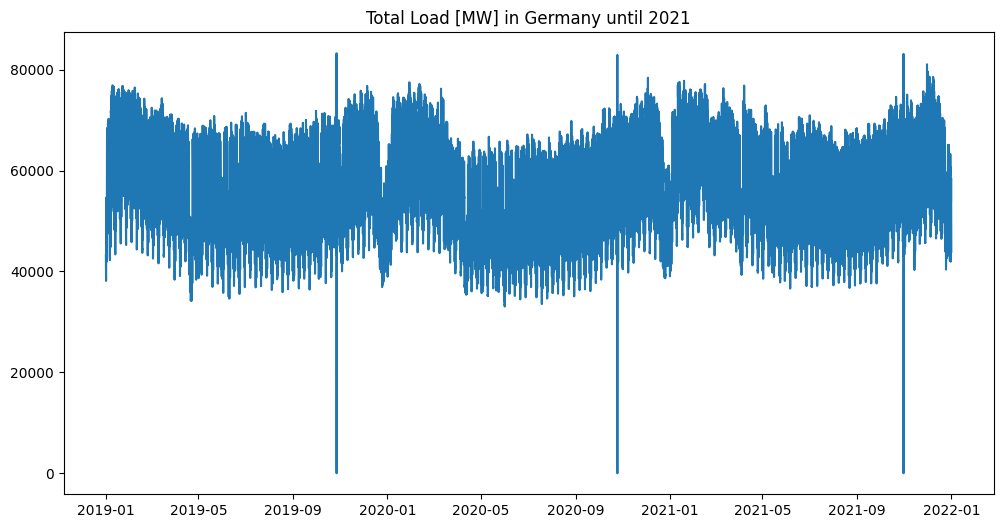

In [114]:
#plot demand data trained hourly
plt.figure(figsize=(12, 6))
plt.plot(demand_data_train_hourly.index, demand_data_train_hourly['Total (Grid Load) [MWh]'])
plt.title("Total Load [MW] in Germany until 2021")


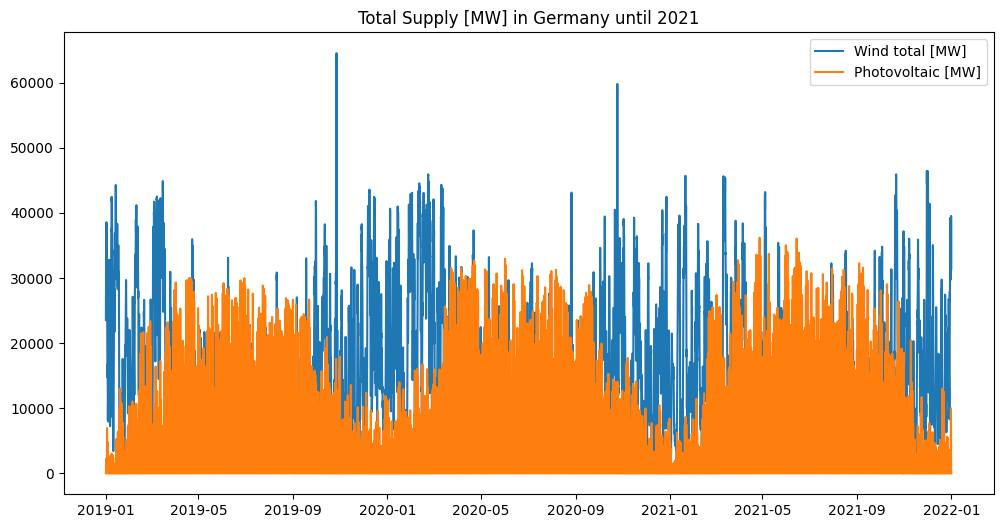

In [115]:
#plot supply data trained hourly
plt.figure(figsize=(12, 6))
plt.plot(supply_data_train_hourly.index, supply_data_train_hourly['Wind total [MW]'], label='Wind total [MW]')
plt.plot(supply_data_train_hourly.index, supply_data_train_hourly['Photovoltaic [MW]'], label='Photovoltaic [MW]')
plt.title("Total Supply [MW] in Germany until 2021")
plt.legend()
plt.show()

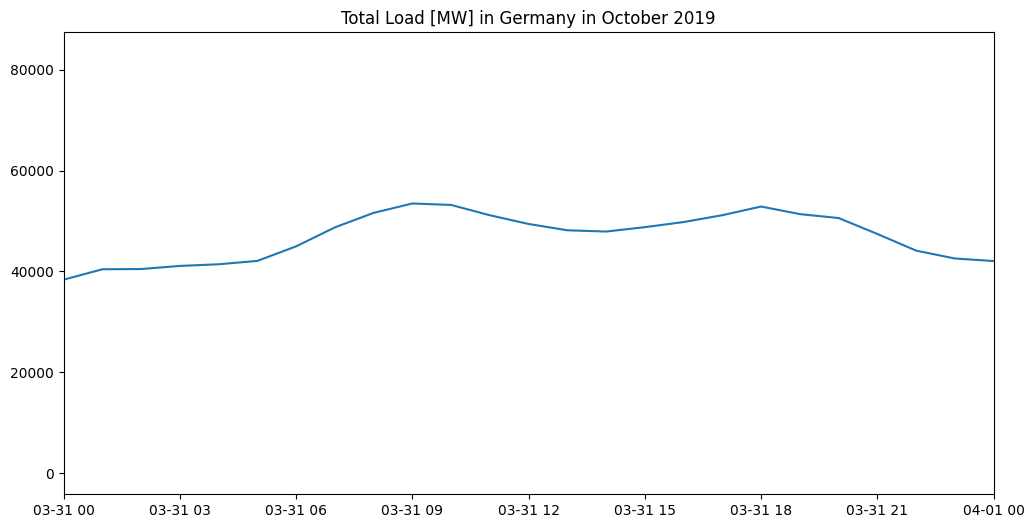

In [116]:
#plot demand in october 2019
plt.figure(figsize=(12, 6))
plt.plot(demand_data_train_hourly.index, demand_data_train_hourly['Total (Grid Load) [MWh]'])
plt.title("Total Load [MW] in Germany in October 2019")
plt.xlim(pd.Timestamp('2019-3-31'), pd.Timestamp('2019-4-01'))
plt.show()


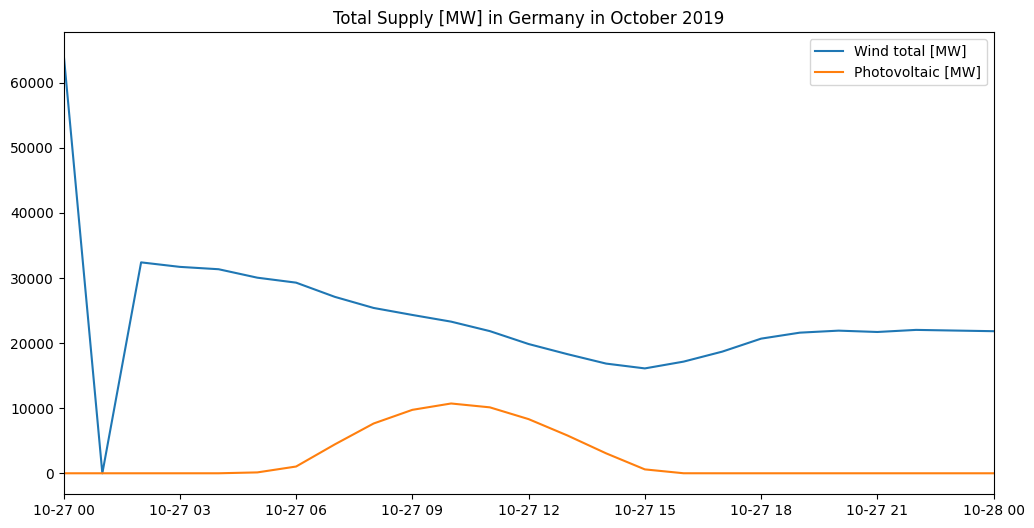

In [117]:
# same for supply
plt.figure(figsize=(12, 6))
plt.plot(supply_data_train_hourly.index, supply_data_train_hourly['Wind total [MW]'], label='Wind total [MW]')
plt.plot(supply_data_train_hourly.index, supply_data_train_hourly['Photovoltaic [MW]'], label='Photovoltaic [MW]')
plt.xlim(pd.Timestamp('2019-10-27'), pd.Timestamp('2019-10-28'))
plt.title("Total Supply [MW] in Germany in October 2019")
plt.legend()

In [118]:
#find columns with missing values
missing_demand = demand_data_train.isnull().sum()
missing_supply = supply_data_train.isnull().sum()
missing_weather = weather_data.isnull().sum()
missing_prices = prices_data_train.isnull().sum()
missing_capacity = installed_capacity_train.isnull().sum()
print("Missing values in demand data: \n", missing_demand[missing_demand > 0])
print("Missing values in supply data: \n", missing_supply[missing_supply > 0])
print("Missing values in weather data: \n", missing_weather[missing_weather > 0])
print("Missing values in prices data: \n", missing_prices[missing_prices > 0])
print("Missing values in capacity data: \n", missing_capacity[missing_capacity > 0])

Missing values in demand data: 
 Series([], dtype: int64)
Missing values in supply data: 
 Series([], dtype: int64)
Missing values in weather data: 
 Series([], dtype: int64)
Missing values in prices data: 
 ∅ Neighbouring DE/LU [€/MWh]     7776
Poland [€/MWh]                   7776
DE/AT/LU [€/MWh]                26305
Hungary [€/MWh]                    24
dtype: int64
Missing values in capacity data: 
 Series([], dtype: int64)


In [119]:
supply_data_train_hourly.head() 

,Biomass [MW],Hydro Power [MW],Wind Offshore [MW],Wind Onshore [MW],Photovoltaic [MW],Other Renewable [MW],Nuclear Power [MW],Lignite [MW],Coal [MW],Natural Gas [MW],Pumped Storage [MW],Other Conventional [MW],Wind total [MW]
Date from,,,,,,,,,,,,,
2018-12-31 23:00:00+00:00,4815.25,1558.00,3134.00,20391.75,0.0,126.0,9001.50,6335.00,2811.75,3273.25,271.75,1724.25,23525.75
2019-01-01 00:00:00+00:00,4808.75,1553.75,2868.25,22365.50,0.0,126.0,8535.25,5379.50,2404.25,2967.25,21.50,1682.25,25233.75
2019-01-01 01:00:00+00:00,4766.25,1511.00,2460.25,23213.25,0.0,126.0,7954.00,5341.00,2228.50,2720.25,150.75,1625.25,25673.50
2019-01-01 02:00:00+00:00,4750.25,1494.75,2696.50,24493.50,0.0,126.0,7221.75,5270.75,2356.75,2653.25,0.00,1615.25,27190.00
2019-01-01 03:00:00+00:00,4755.50,1458.25,2578.00,26399.00,0.0,125.0,7120.00,5178.75,2308.50,2706.00,3.50,1621.50,28977.00


In [120]:
# create new dataframe with hourly demand with wind total and photovoltaic supply
supply_data_train_hourly = supply_data_train_hourly[['Photovoltaic [MW]', 'Wind total [MW]']] # Select only the columns we need

merged_data = demand_data_train_hourly.merge(supply_data_train_hourly, on='Date from', how='left')
merged_data = merged_data.merge(averages, left_on='Date from', right_on='time', how='left')
merged_data.head()


,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],time,cdir,z,msl,blh,...,t2m,ssr,tsr,sund,tp,fsr,u100,v100,forecast_origin,t2m_C
0,43265.50,19739.75,1375.0,0.0,23525.75,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,41654.00,16420.25,1533.5,0.0,25233.75,2019-01-01 00:00:00+00:00,0.0,3360.296561,103009.967750,507.635043,...,278.216013,0.0,0.0,0.0,0.000000,0.741971,6.545994,1.122055,2019-01-01 00:00:00+00:00,5.066013
2,40113.75,14440.25,2598.5,0.0,25673.50,2019-01-01 01:00:00+00:00,0.0,3360.296561,102964.489612,544.627164,...,278.310794,0.0,0.0,0.0,0.000038,0.742205,6.838839,1.241379,2019-01-01 00:00:00+00:00,5.160794
3,39313.00,12123.00,3433.5,0.0,27190.00,2019-01-01 02:00:00+00:00,0.0,3360.296561,102908.208325,575.103757,...,278.206292,0.0,0.0,0.0,0.000070,0.742254,7.183921,1.428783,2019-01-01 00:00:00+00:00,5.056292
4,39097.25,10120.25,3826.0,0.0,28977.00,2019-01-01 03:00:00+00:00,0.0,3360.296561,102827.034387,612.314609,...,278.140331,0.0,0.0,0.0,0.000099,0.742272,7.660834,1.501984,2019-01-01 00:00:00+00:00,4.990331


In [121]:
# only keep date wint toal and photovoltaic in intall capacity  
installed_capacity_train = installed_capacity_train[['Date from', 'Date to', 'Wind total [MW]', 'Photovoltaic [MW]']]

installed_capacity_train['year'] = installed_capacity_train['Date from'].dt.year
installed_capacity_train = installed_capacity_train[['Wind total [MW]', 'Photovoltaic [MW]', 'year']]
installed_capacity_train.dtypes


Wind total [MW]      float64
Photovoltaic [MW]    float64
year                   int64
dtype: object

In [122]:
merged_data['year'] = merged_data['time'].dt.year
#convert year to in if it is not a nan
merged_data['year'] = merged_data['year'].fillna(-1).astype(int)
merged_data.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW],Wind total [MW],time,cdir,z,msl,blh,...,ssr,tsr,sund,tp,fsr,u100,v100,forecast_origin,t2m_C,year
0,43265.50,19739.75,1375.0,0.0,23525.75,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,-1
1,41654.00,16420.25,1533.5,0.0,25233.75,2019-01-01 00:00:00+00:00,0.0,3360.296561,103009.967750,507.635043,...,0.0,0.0,0.0,0.000000,0.741971,6.545994,1.122055,2019-01-01 00:00:00+00:00,5.066013,2019
2,40113.75,14440.25,2598.5,0.0,25673.50,2019-01-01 01:00:00+00:00,0.0,3360.296561,102964.489612,544.627164,...,0.0,0.0,0.0,0.000038,0.742205,6.838839,1.241379,2019-01-01 00:00:00+00:00,5.160794,2019
3,39313.00,12123.00,3433.5,0.0,27190.00,2019-01-01 02:00:00+00:00,0.0,3360.296561,102908.208325,575.103757,...,0.0,0.0,0.0,0.000070,0.742254,7.183921,1.428783,2019-01-01 00:00:00+00:00,5.056292,2019
4,39097.25,10120.25,3826.0,0.0,28977.00,2019-01-01 03:00:00+00:00,0.0,3360.296561,102827.034387,612.314609,...,0.0,0.0,0.0,0.000099,0.742272,7.660834,1.501984,2019-01-01 00:00:00+00:00,4.990331,2019


In [123]:
#merge data with installed capacity on year
merged_data = merged_data.merge(installed_capacity_train, on='year', how='left')
merged_data.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW]_x,Wind total [MW]_x,time,cdir,z,msl,blh,...,sund,tp,fsr,u100,v100,forecast_origin,t2m_C,year,Wind total [MW]_y,Photovoltaic [MW]_y
0,43265.50,19739.75,1375.0,0.0,23525.75,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,-1,NaN,NaN
1,41654.00,16420.25,1533.5,0.0,25233.75,2019-01-01 00:00:00+00:00,0.0,3360.296561,103009.967750,507.635043,...,0.0,0.000000,0.741971,6.545994,1.122055,2019-01-01 00:00:00+00:00,5.066013,2019,61057.0,47754.0
2,40113.75,14440.25,2598.5,0.0,25673.50,2019-01-01 01:00:00+00:00,0.0,3360.296561,102964.489612,544.627164,...,0.0,0.000038,0.742205,6.838839,1.241379,2019-01-01 00:00:00+00:00,5.160794,2019,61057.0,47754.0
3,39313.00,12123.00,3433.5,0.0,27190.00,2019-01-01 02:00:00+00:00,0.0,3360.296561,102908.208325,575.103757,...,0.0,0.000070,0.742254,7.183921,1.428783,2019-01-01 00:00:00+00:00,5.056292,2019,61057.0,47754.0
4,39097.25,10120.25,3826.0,0.0,28977.00,2019-01-01 03:00:00+00:00,0.0,3360.296561,102827.034387,612.314609,...,0.0,0.000099,0.742272,7.660834,1.501984,2019-01-01 00:00:00+00:00,4.990331,2019,61057.0,47754.0


In [124]:
prices_data_train_needed = prices_data_train[['Date from', 'Germany/Luxembourg [€/MWh]']]
prices_data_train_needed.head()
prices_data_train_needed['time'] = prices_data_train_needed['Date from']
prices_data_train_needed.head()


C:\Users\belau\AppData\Local\Temp\ipykernel_20616\1401735919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_data_train_needed['time'] = prices_data_train_needed['Date from']


,Date from,Germany/Luxembourg [€/MWh],time
0,2018-12-31 23:00:00+00:00,28.32,2018-12-31 23:00:00+00:00
1,2019-01-01 00:00:00+00:00,10.07,2019-01-01 00:00:00+00:00
2,2019-01-01 01:00:00+00:00,-4.08,2019-01-01 01:00:00+00:00
3,2019-01-01 02:00:00+00:00,-9.91,2019-01-01 02:00:00+00:00
4,2019-01-01 03:00:00+00:00,-7.41,2019-01-01 03:00:00+00:00


In [125]:
#get demand data for 2019-10-27 01:00:00+00:00, 2020-10-25 01:00:00+00:00 and 2021-10-31 01:00:00+00:00
need_data = demand_data[demand_data['Date from'].dt.date.isin(october_2019.date) ]
need_data.head(20)




,Date from,Date to,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh]
28708,2019-10-27 00:00:00+00:00,2019-10-27 00:15:00+00:00,"10.575,75","2.454,25",992
28709,2019-10-27 00:15:00+00:00,2019-10-27 00:30:00+00:00,"10.532,50","2.425,00","1.002,00"
28710,2019-10-27 00:30:00+00:00,2019-10-27 00:45:00+00:00,"10.435,25","2.281,75","1.002,25"
28711,2019-10-27 00:45:00+00:00,2019-10-27 02:00:00+00:00,"10.427,50","2.209,25","1.031,75"
28712,2019-10-27 00:00:00+00:00,2019-10-27 00:15:00+00:00,"10.356,25","2.228,25","1.052,00"
28713,2019-10-27 00:15:00+00:00,2019-10-27 00:30:00+00:00,"10.319,50","2.300,00","1.100,75"
28714,2019-10-27 00:30:00+00:00,2019-10-27 00:45:00+00:00,"10.338,75","2.421,25","1.151,75"
28715,2019-10-27 00:45:00+00:00,2019-10-27 02:00:00+00:00,"10.274,25","2.427,25","997,25"
28716,2019-10-27 02:00:00+00:00,2019-10-27 02:15:00+00:00,"10.322,50","2.248,50","939,5"
28717,2019-10-27 02:15:00+00:00,2019-10-27 02:30:00+00:00,"10.312,75","2.264,75","979,75"


In [126]:
#take values from index 28712 - 28715 sum them up and save as new df
need_data_okt_19_demand = demand_data.iloc[28712:28715+1].applymap(clean_convert_to_float).sum(axis=1).to_frame().T
need_data_okt_19_demand


C:\Users\belau\AppData\Local\Temp\ipykernel_20616\1070223312.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  need_data_okt_19_demand = demand_data.iloc[28712:28715+1].applymap(clean_convert_to_float).sum(axis=1).to_frame().T


,28712,28713,28714,28715
0,13636.5,13720.25,13911.75,13698.75


In [127]:
# demand data for oktober 25th 2020
demand_okt_25_2020 = demand_data[demand_data['Date from'].dt.date.isin(pd.date_range(start='2020-10-25', end='2020-10-25').date)]
demand_okt_25_2020.head(20)
need_data_okt_20_demand = demand_data.iloc[63656:63659+1].applymap(clean_convert_to_float).sum(axis=1).to_frame().T
need_data_okt_20_demand

C:\Users\belau\AppData\Local\Temp\ipykernel_20616\2395487678.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  need_data_okt_20_demand = demand_data.iloc[63656:63659+1].applymap(clean_convert_to_float).sum(axis=1).to_frame().T


,63656,63657,63658,63659
0,13784.5,13832.75,13852.0,13234.5


In [128]:
#demand data for oktober 31st 2021
demand_okt_31_2021 = demand_data[demand_data['Date from'].dt.date.isin(pd.date_range(start='2021-10-31', end='2021-10-31').date)]
demand_okt_31_2021.head(10)
need_data_okt_21_demand = demand_data.iloc[99272:99275+1].applymap(clean_convert_to_float).sum(axis=1).to_frame().T
need_data_okt_21_demand

C:\Users\belau\AppData\Local\Temp\ipykernel_20616\4149466197.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  need_data_okt_21_demand = demand_data.iloc[99272:99275+1].applymap(clean_convert_to_float).sum(axis=1).to_frame().T


,99272,99273,99274,99275
0,17199.5,17217.75,17204.0,17219.5


In [129]:
merged_data = merged_data.merge(prices_data_train_needed, on='time', how='left')
merged_data.head()

#check missing values
missing = merged_data.isnull().sum()
print("Missing values in merged data: \n", missing[missing > 0])
#show rows with missing values
merged_data[merged_data.isnull().any(axis=1)]
#TODO fill these 3 rows with the data from the respective data in demand data , supply data  and prices also remove the same data from the column before since it was falsely added
#data needed



Missing values in merged data: 
 time                          1
cdir                          1
z                             1
msl                           1
blh                           1
tcc                           1
u10                           1
v10                           1
t2m                           1
ssr                           1
tsr                           1
sund                          1
tp                            1
fsr                           1
u100                          1
v100                          1
forecast_origin               1
t2m_C                         1
Wind total [MW]_y             1
Photovoltaic [MW]_y           1
Date from                     4
Germany/Luxembourg [€/MWh]    4
dtype: int64


,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW]_x,Wind total [MW]_x,time,cdir,z,msl,blh,...,fsr,u100,v100,forecast_origin,t2m_C,year,Wind total [MW]_y,Photovoltaic [MW]_y,Date from,Germany/Luxembourg [€/MWh]
0,43265.5,19739.75,1375.0,0.0,23525.75,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,-1,NaN,NaN,NaT,NaN
7179,0.0,0.00,0.0,0.0,0.00,2019-10-27 01:00:00+00:00,4.0,3360.296561,101517.141050,552.424927,...,0.746444,6.703164,4.644260,2019-01-01 00:00:00+00:00,12.218582,2019,61057.0,47754.0,NaT,NaN
15916,0.0,0.00,0.0,0.0,0.00,2020-10-25 01:00:00+00:00,0.0,3360.296561,101099.144888,488.389414,...,0.745021,1.957545,7.649652,2019-01-01 00:00:00+00:00,9.986260,2020,62119.0,50410.0,NaT,NaN
24821,0.0,0.00,0.0,0.0,0.00,2021-10-31 01:00:00+00:00,0.0,3360.296561,101013.975813,290.689173,...,0.744168,2.422639,5.501494,2019-01-01 00:00:00+00:00,9.370645,2021,63076.0,57744.0,NaT,NaN


In [130]:
merged_data.dropna(inplace=True)

In [131]:
# ger total frid and residual load from demand data on 2019-10-27
demand_data_train_hourly.columns

Index(['Total (Grid Load) [MWh]', 'Residual Load [MWh]',
       'Pumped Storage [MWh]'],
      dtype='object')

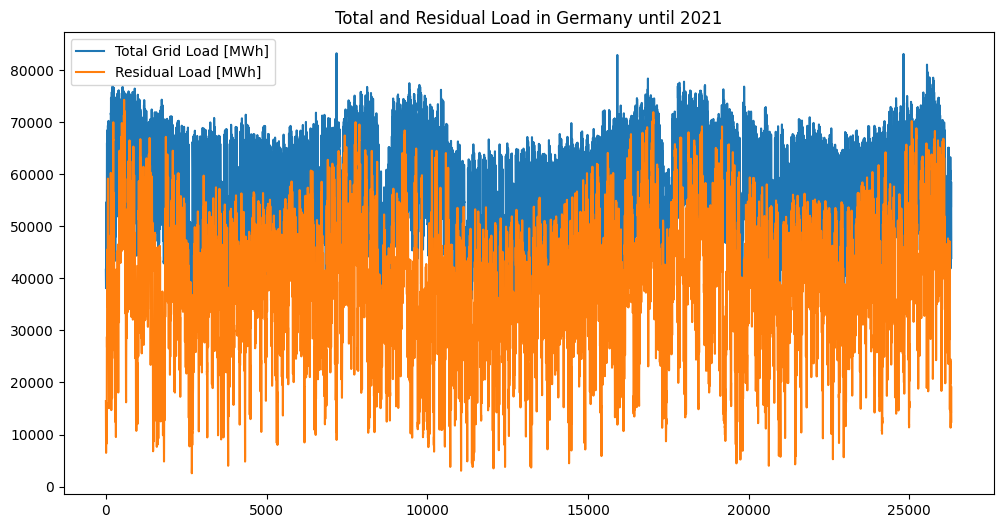

In [132]:
#plot demand data train horuly 
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Total (Grid Load) [MWh]'], label='Total Grid Load [MWh]')
plt.plot(merged_data.index, merged_data['Residual Load [MWh]'], label='Residual Load [MWh]')
plt.title("Total and Residual Load in Germany until 2021")
plt.legend()
plt.show()

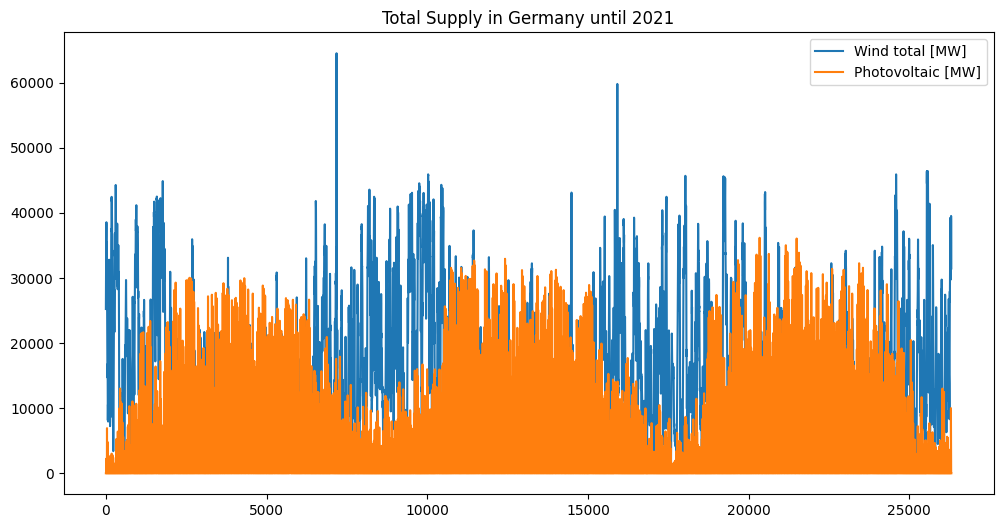

In [133]:
# plot supply data train hourly
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Wind total [MW]_x'], label='Wind total [MW]')
plt.plot(merged_data.index, merged_data['Photovoltaic [MW]_x'], label='Photovoltaic [MW]')
#plt.xlim(pd.Timestamp('2019-1-1'), pd.Timestamp('2022-1-1'))
plt.title("Total Supply in Germany until 2021")
plt.legend()
plt.show()

In [134]:
# drop first row since it has NaN values and reset index
merged_data = merged_data.dropna().reset_index(drop=True)
merged_data.head()


,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW]_x,Wind total [MW]_x,time,cdir,z,msl,blh,...,fsr,u100,v100,forecast_origin,t2m_C,year,Wind total [MW]_y,Photovoltaic [MW]_y,Date from,Germany/Luxembourg [€/MWh]
0,41654.00,16420.25,1533.50,0.0,25233.75,2019-01-01 00:00:00+00:00,0.0,3360.296561,103009.967750,507.635043,...,0.741971,6.545994,1.122055,2019-01-01 00:00:00+00:00,5.066013,2019,61057.0,47754.0,2019-01-01 00:00:00+00:00,10.07
1,40113.75,14440.25,2598.50,0.0,25673.50,2019-01-01 01:00:00+00:00,0.0,3360.296561,102964.489612,544.627164,...,0.742205,6.838839,1.241379,2019-01-01 00:00:00+00:00,5.160794,2019,61057.0,47754.0,2019-01-01 01:00:00+00:00,-4.08
2,39313.00,12123.00,3433.50,0.0,27190.00,2019-01-01 02:00:00+00:00,0.0,3360.296561,102908.208325,575.103757,...,0.742254,7.183921,1.428783,2019-01-01 00:00:00+00:00,5.056292,2019,61057.0,47754.0,2019-01-01 02:00:00+00:00,-9.91
3,39097.25,10120.25,3826.00,0.0,28977.00,2019-01-01 03:00:00+00:00,0.0,3360.296561,102827.034387,612.314609,...,0.742272,7.660834,1.501984,2019-01-01 00:00:00+00:00,4.990331,2019,61057.0,47754.0,2019-01-01 03:00:00+00:00,-7.41
4,38634.50,8356.25,4977.75,0.0,30278.25,2019-01-01 04:00:00+00:00,0.0,3360.296561,102725.913987,660.112603,...,0.742255,8.147790,1.289936,2019-01-01 00:00:00+00:00,4.952989,2019,61057.0,47754.0,2019-01-01 04:00:00+00:00,-12.55


In [135]:
dropped_columns = ['year', 'forecast_origin']
merged_data.drop(dropped_columns, axis=1, inplace=True)


In [136]:
# find most significant variables in data for solar energy prediction / wind energy prediction

# normalize data
# check for seasonality
# build data and split in train and validation set



In [137]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    return adfuller(timeseries, autolag='AIC')
# check all variables that are not constant in merged data for stationarity and print only the ones that are not stationary

for column in merged_data.columns:
    if column in ['z','Wind total [MW]_y', 'Photovoltaic [MW]_y', 'Date from']:
        continue
    result = test_stationarity(merged_data[column])
    if result[1] > 0.05:
        print(f"{column} is not stationary with p-value {result[1]}")
    

time is not stationary with p-value 0.9743090215217265
cdir is not stationary with p-value 0.8160654524689828


In [138]:
merged_data.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW]_x,Wind total [MW]_x,time,cdir,z,msl,blh,...,sund,tp,fsr,u100,v100,t2m_C,Wind total [MW]_y,Photovoltaic [MW]_y,Date from,Germany/Luxembourg [€/MWh]
0,41654.00,16420.25,1533.50,0.0,25233.75,2019-01-01 00:00:00+00:00,0.0,3360.296561,103009.967750,507.635043,...,0.0,0.000000,0.741971,6.545994,1.122055,5.066013,61057.0,47754.0,2019-01-01 00:00:00+00:00,10.07
1,40113.75,14440.25,2598.50,0.0,25673.50,2019-01-01 01:00:00+00:00,0.0,3360.296561,102964.489612,544.627164,...,0.0,0.000038,0.742205,6.838839,1.241379,5.160794,61057.0,47754.0,2019-01-01 01:00:00+00:00,-4.08
2,39313.00,12123.00,3433.50,0.0,27190.00,2019-01-01 02:00:00+00:00,0.0,3360.296561,102908.208325,575.103757,...,0.0,0.000070,0.742254,7.183921,1.428783,5.056292,61057.0,47754.0,2019-01-01 02:00:00+00:00,-9.91
3,39097.25,10120.25,3826.00,0.0,28977.00,2019-01-01 03:00:00+00:00,0.0,3360.296561,102827.034387,612.314609,...,0.0,0.000099,0.742272,7.660834,1.501984,4.990331,61057.0,47754.0,2019-01-01 03:00:00+00:00,-7.41
4,38634.50,8356.25,4977.75,0.0,30278.25,2019-01-01 04:00:00+00:00,0.0,3360.296561,102725.913987,660.112603,...,0.0,0.000135,0.742255,8.147790,1.289936,4.952989,61057.0,47754.0,2019-01-01 04:00:00+00:00,-12.55


In [139]:
# make cdir stationary
merged_data['cdir_nonstat'] = merged_data['cdir'].diff().fillna(0)


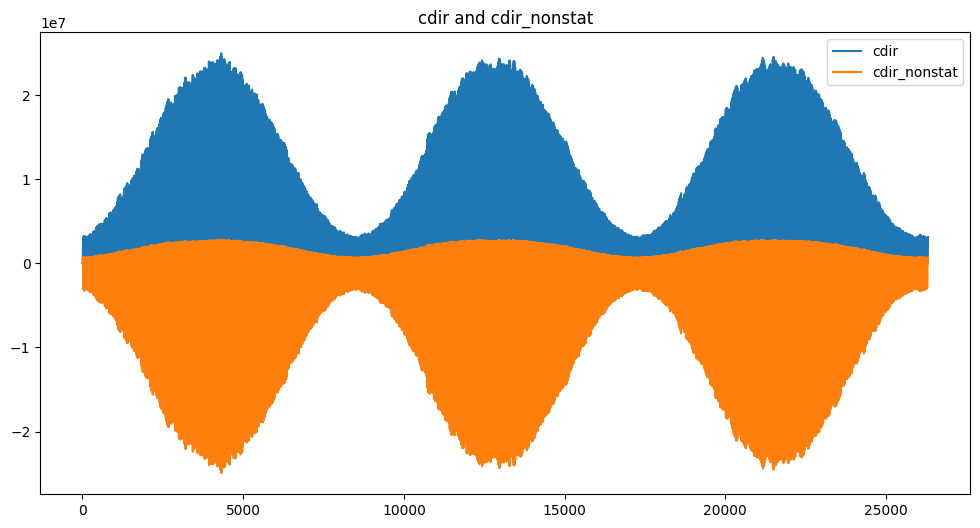

In [140]:
# compare cdir before and after in plot
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index,merged_data['cdir'], label='cdir')
plt.plot(merged_data.index,merged_data['cdir_nonstat'], label='cdir_nonstat')
plt.title("cdir and cdir_nonstat")
plt.legend()
plt.show()


In [141]:
# check non stationary variables again for stationarity
res = test_stationarity(merged_data['cdir_nonstat'])
# p value
print(res[1])

0.0


In [142]:
merged_data.columns


Index(['Total (Grid Load) [MWh]', 'Residual Load [MWh]',
       'Pumped Storage [MWh]', 'Photovoltaic [MW]_x', 'Wind total [MW]_x',
       'time', 'cdir', 'z', 'msl', 'blh', 'tcc', 'u10', 'v10', 't2m', 'ssr',
       'tsr', 'sund', 'tp', 'fsr', 'u100', 'v100', 't2m_C',
       'Wind total [MW]_y', 'Photovoltaic [MW]_y', 'Date from',
       'Germany/Luxembourg [€/MWh]', 'cdir_nonstat'],
      dtype='object')

In [144]:
final_dataset = merged_data.drop(['cdir', 'time', 'Date from', 'z', 't2m_C'], axis=1)
final_dataset['wind_speed_10'] = np.sqrt(final_dataset['u10']**2 + final_dataset['v10']**2)
final_dataset['wind_speed_100'] = np.sqrt(final_dataset['u100']**2 + final_dataset['v100']**2)
final_dataset.drop(['u10', 'v10', 'u100', 'v100'], axis=1, inplace=True)

In [164]:
# apply Exponential Moving Average
ema_data = final_dataset.ewm(span=12, adjust=False).mean()




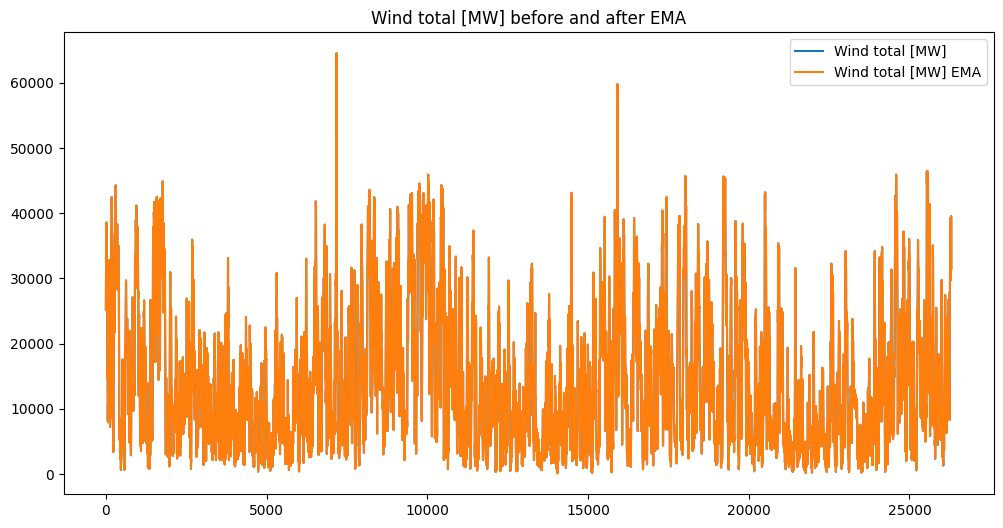

In [165]:
# plot supply data before and afret EMA for april 2020
plt.figure(figsize=(12, 6))
plt.plot(final_dataset.index, final_dataset['Wind total [MW]_x'], label='Wind total [MW]')
plt.plot(ema_data.index, ema_data['Wind total [MW]_x'], label='Wind total [MW] EMA')
#plt.xlim(pd.Timestamp('2019-1-1'), pd.Timestamp('2022-1-1'))
plt.title("Wind total [MW] before and after EMA")
plt.legend()
plt.show()



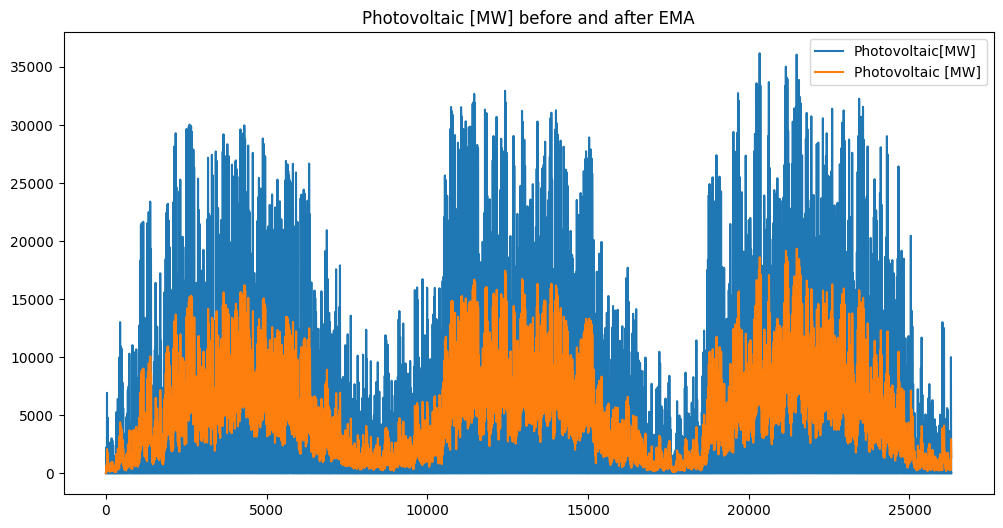

In [147]:
# plot supply data before and afret EMA for april 2020
plt.figure(figsize=(12, 6))
plt.plot(final_dataset.index, final_dataset['Photovoltaic [MW]_x'], label='Photovoltaic[MW]')
plt.plot(ema_data.index, ema_data['Photovoltaic [MW]_x'], label='Photovoltaic [MW]')
#plt.xlim(pd.Timestamp('2019-1-1'), pd.Timestamp('2022-1-1'))
plt.title("Photovoltaic [MW] before and after EMA")
plt.legend()
plt.show()


In [148]:
ema_data.columns


Index(['Total (Grid Load) [MWh]', 'Residual Load [MWh]',
       'Pumped Storage [MWh]', 'Photovoltaic [MW]_x', 'Wind total [MW]_x',
       'msl', 'blh', 'tcc', 't2m', 'ssr', 'tsr', 'sund', 'tp', 'fsr',
       'Wind total [MW]_y', 'Photovoltaic [MW]_y',
       'Germany/Luxembourg [€/MWh]', 'cdir_nonstat', 'wind_speed_10',
       'wind_speed_100'],
      dtype='object')

In [149]:
def z_norm(arr, epsilon=1e-100):
    return (arr-arr.mean())/(arr.std()+epsilon) 
# apply z score normalization for each colums separately 
z_norm_data = ema_data.copy()
for column in z_norm_data.columns:
    z_norm_data[column] = z_norm(z_norm_data[column])
z_norm_data.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW]_x,Wind total [MW]_x,msl,blh,tcc,t2m,ssr,tsr,sund,tp,fsr,Wind total [MW]_y,Photovoltaic [MW]_y,Germany/Luxembourg [€/MWh],cdir_nonstat,wind_speed_10,wind_speed_100
0,-2.288017,-2.194989,0.262193,-1.338965,1.241078,1.611222,-0.217294,1.609158,-0.699260,-1.472248,-1.594462,-1.879473,-1.034337,-0.428183,-1.245326,-0.997337,-0.908698,-0.000165,0.939037,0.946843
1,-2.306956,-2.211520,0.442297,-1.338965,1.244958,1.607023,-0.204026,1.606251,-0.698130,-1.472248,-1.594462,-1.879473,-1.031697,-0.420637,-1.245326,-0.997337,-0.931610,-0.000165,0.953130,0.958498
2,-2.334226,-2.246074,0.749202,-1.338965,1.261907,1.597965,-0.180887,1.606598,-0.698336,-1.472248,-1.594462,-1.879473,-1.027074,-0.412094,-1.245326,-0.997337,-0.962128,-0.000165,0.981258,0.983325
3,-2.361967,-2.294585,1.097932,-1.338965,1.293266,1.582137,-0.146253,1.611866,-0.699312,-1.472248,-1.594462,-1.879473,-1.020792,-0.403639,-1.245326,-0.997337,-0.986157,-0.000165,1.025868,1.024341
4,-2.393179,-2.353942,1.613538,-1.338965,1.333598,1.558240,-0.097245,1.617681,-0.700655,-1.472248,-1.594462,-1.879473,-1.012505,-0.396434,-1.245326,-0.997337,-1.016586,-0.000165,1.084914,1.078764


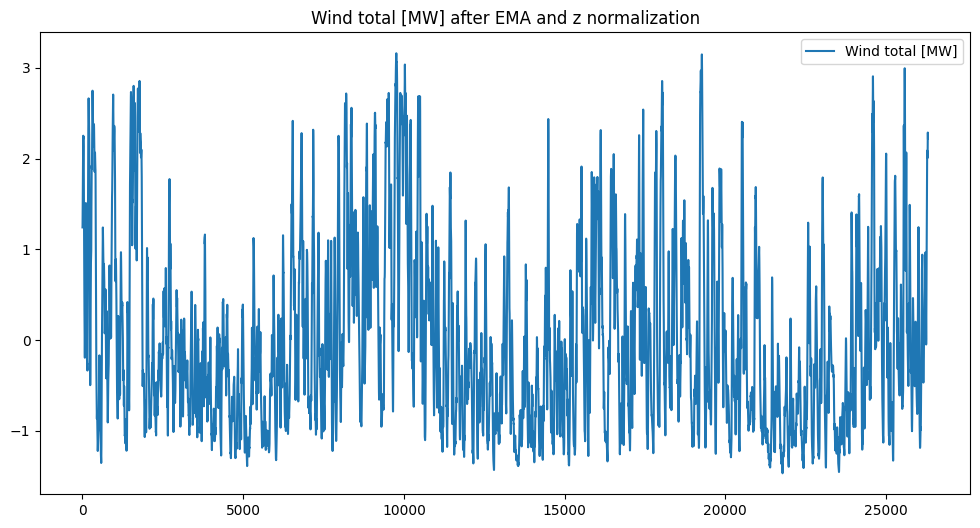

In [150]:
# plot supply data before and afret EMA for april 2020
plt.figure(figsize=(12, 6))
#plt.plot(final_dataset.index, final_dataset['Wind total [MW]_x'], label='Wind total [MW]')
plt.plot(z_norm_data.index, z_norm_data['Wind total [MW]_x'], label='Wind total [MW]')
# use dates as x axis description
#plt.xlim(pd.Timestamp('2019-1-1'), pd.Timestamp('2022-1-1'))

plt.title("Wind total [MW] after EMA and z normalization")
plt.legend()
plt.show()

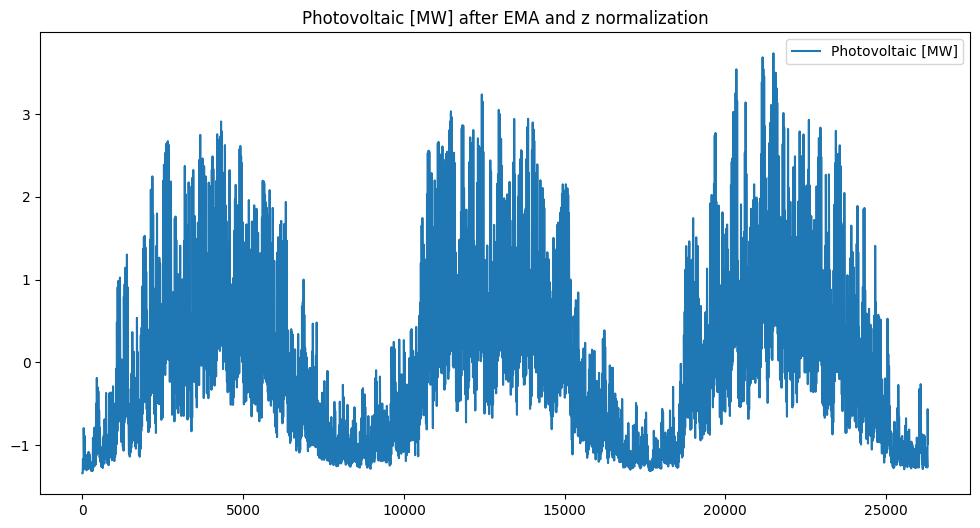

In [151]:
# plot supply data before and afret EMA for april 2020
plt.figure(figsize=(12, 6))
#plt.plot(final_dataset.index, final_dataset['Wind total [MW]_x'], label='Wind total [MW]')
plt.plot(z_norm_data.index, z_norm_data['Photovoltaic [MW]_x'], label='Photovoltaic [MW]')
# use dates as x axis description
#plt.xlim(pd.Timestamp('2019-1-1'), pd.Timestamp('2022-1-1'))

plt.title("Photovoltaic [MW] after EMA and z normalization")
plt.legend()
plt.show()

In [152]:
final_dataset.head()

,Total (Grid Load) [MWh],Residual Load [MWh],Pumped Storage [MWh],Photovoltaic [MW]_x,Wind total [MW]_x,msl,blh,tcc,t2m,ssr,tsr,sund,tp,fsr,Wind total [MW]_y,Photovoltaic [MW]_y,Germany/Luxembourg [€/MWh],cdir_nonstat,wind_speed_10,wind_speed_100
0,41654.00,16420.25,1533.50,0.0,25233.75,103009.967750,507.635043,0.966562,278.216013,0.0,0.0,0.0,0.000000,0.741971,61057.0,47754.0,10.07,0.0,4.011230,6.641464
1,40113.75,14440.25,2598.50,0.0,25673.50,102964.489612,544.627164,0.959348,278.310794,0.0,0.0,0.0,0.000038,0.742205,61057.0,47754.0,-4.08,0.0,4.241842,6.950593
2,39313.00,12123.00,3433.50,0.0,27190.00,102908.208325,575.103757,0.966846,278.206292,0.0,0.0,0.0,0.000070,0.742254,61057.0,47754.0,-9.91,0.0,4.489959,7.324626
3,39097.25,10120.25,3826.00,0.0,28977.00,102827.034387,612.314609,0.979125,278.140331,0.0,0.0,0.0,0.000099,0.742272,61057.0,47754.0,-7.41,0.0,4.796500,7.806685
4,38634.50,8356.25,4977.75,0.0,30278.25,102725.913987,660.112603,0.981526,278.102989,0.0,0.0,0.0,0.000135,0.742255,61057.0,47754.0,-12.55,0.0,5.091120,8.249267


In [153]:
# find most significant variables in data for solar energy prediction / wind energy prediction

#pearson correlation to find most significant variables for solar energy supply  
correlation = z_norm_data.corr()
correlation['Photovoltaic [MW]_x'].sort_values(ascending=False)


Photovoltaic [MW]_x           1.000000
ssr                           0.715951
tsr                           0.688872
sund                          0.678284
t2m                           0.641303
cdir_nonstat                  0.425488
blh                           0.365031
fsr                           0.340067
msl                           0.185387
Wind total [MW]_y             0.059150
Photovoltaic [MW]_y           0.051258
Pumped Storage [MWh]         -0.104079
Germany/Luxembourg [€/MWh]   -0.160357
Residual Load [MWh]          -0.230074
tp                           -0.254844
Total (Grid Load) [MWh]      -0.264457
wind_speed_10                -0.266773
wind_speed_100               -0.332507
Wind total [MW]_x            -0.367239
tcc                          -0.529504
Name: Photovoltaic [MW]_x, dtype: float64

In [154]:
#pearson correlation to find most significant variables for wind energy supply  
correlation['Wind total [MW]_x'].sort_values(ascending=False)

Wind total [MW]_x             1.000000
wind_speed_100                0.931298
wind_speed_10                 0.924044
blh                           0.488073
Pumped Storage [MWh]          0.375644
Total (Grid Load) [MWh]       0.296645
tcc                           0.280068
tp                            0.271908
cdir_nonstat                 -0.007720
Wind total [MW]_y            -0.055097
Photovoltaic [MW]_y          -0.071885
fsr                          -0.100984
Germany/Luxembourg [€/MWh]   -0.220585
msl                          -0.261301
t2m                          -0.328810
Photovoltaic [MW]_x          -0.367239
sund                         -0.383605
tsr                          -0.395373
ssr                          -0.401057
Residual Load [MWh]          -0.598697
Name: Wind total [MW]_x, dtype: float64

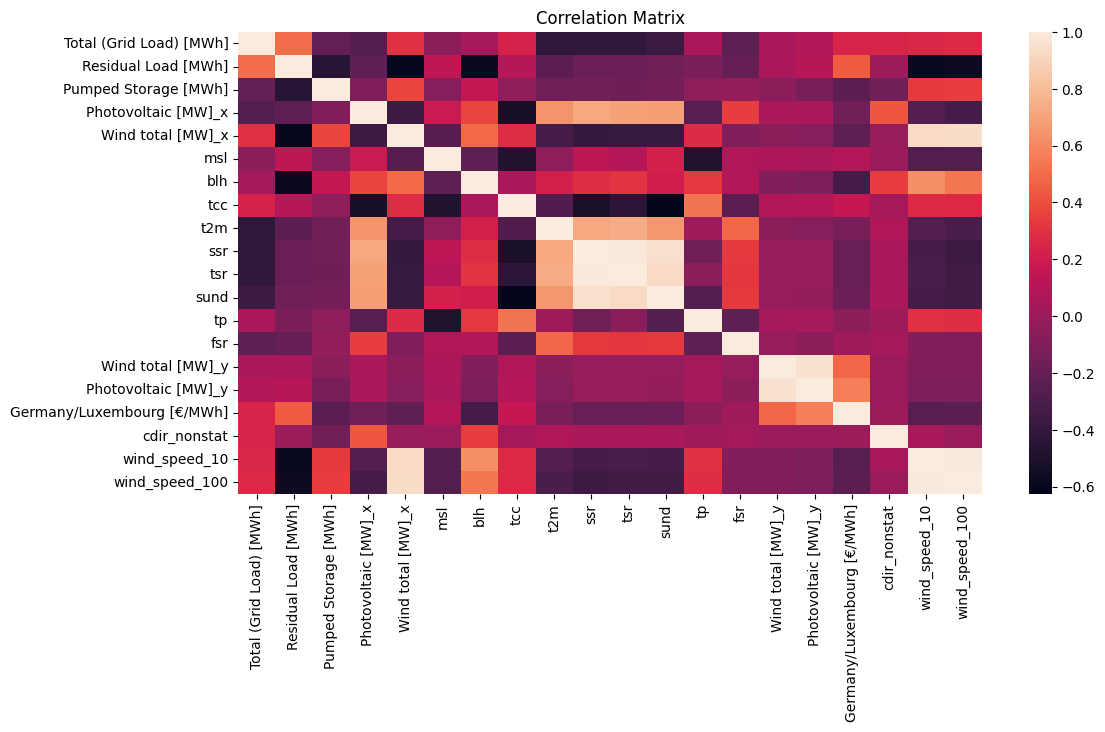

In [155]:
#plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=False)
# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)
# remove values in matrix
plt.title("Correlation Matrix")
plt.show()

In [158]:
# select only the most significant variables for solar energy prediction
significant_solar = correlation['Photovoltaic [MW]_x'].sort_values(ascending=False).index[:6]
significant_solar

Index(['Photovoltaic [MW]_x', 'ssr', 'tsr', 'sund', 't2m', 'cdir_nonstat'], dtype='object')

In [159]:
significant_wind = correlation['Wind total [MW]_x'].sort_values(ascending=False).index[:6]
significant_wind

Index(['Wind total [MW]_x', 'wind_speed_100', 'wind_speed_10', 'blh',
       'Pumped Storage [MWh]', 'Total (Grid Load) [MWh]'],
      dtype='object')